# First steps with the nullspace optimizer

This notebook proposes you to familiar you with the nullspace optimization algorithm, which in the case of equality constrained optimization, reduces to the flow proposed by Yamashita in 

*H. Yamashita, A differential equation approach to nonlinear programming. Math. Program.18(1980) 155–168.*

The flow reads 

\begin{equation}
\newcommand{\DD}{\mathrm{D}}
\renewcommand{\dagger}{T}
\renewcommand{\x}{x}
\renewcommand{\I}{I}
\renewcommand{\g}{g}
    \label{eqn:flow}
    \left\{\begin{aligned}
            \dot\x&={ -\alpha_J(\I-\DD\g^\dagger(\DD\g\DD\g^ \dagger)^{-1}\DD\g(x))\nabla
            J(x) }{ -\alpha_C\DD\g^ \dagger(\DD\g\DD\g^ \dagger)^{-1}\g(x) }\\
    \x(0)&=x_0
        \end{aligned}\right.
\end{equation}

where $J$ is the cost function and $g$ the equality constraint:
\begin{equation}
    \label{eqn:nlsvg}
\begin{aligned}
	\min_{\x\in \mathbb{R}^n}&  \quad J(\x)\\
	\textrm{s.t.} & \left.\begin{aligned}
 \g(\x)&=0
		\end{aligned}\right.
\end{aligned}
\end{equation}


## 1. A first optimization program

Write an optimization program to solve the constrained minimization problem on the hyperbola:
            $$
            \begin{aligned}
                \min_{(x_1,x_2)\in\mathbb{R}^{2}} & \qquad x_1+x_2\\
                s.t. & \left.\begin{aligned}
  x_1x_2 &= 1. 
                \end{aligned}\right.
            \end{aligned}
$$

In order to solve the optimization problem, we use the function `nlspace_solve` which solves the above optimization program and whose prototype is 
```python
from nullspace_optimizer import nlspace_solve

# Define problem

results = nlspace_solve(problem: Optimizable, params=None, results=None)
```
The input variables are 
-  `problem` : an `Optimizable` object described below. This variable contains all the information about the optimization problem to solve (objective and constraint functions, derivatives...)
- `params`  : (optional) a dictionary containing algorithm parameters.

- `results` : (optional) a previous output of the `nlspace_solve` function.         The optimization will then keep going from the last input of           the dictionary `results['x'][-1]`. This is useful when one needs to restart an optimization after an interruption.

The optimization routine `nlspace_solve` returns the dictionary `opt_results` which contains various information about the optimization path, including the values of the optimization variables `results['x']`.
    
    
 In our particular optimization test case in $\mathbb R^n$ with $n=2$, we use the  `EuclideanOptimizable` class which inherits `Optimizable` which simplifies the definition of the optimization program (the inner product is specified by default). 
We allow the user to specify the initialization in the constructor `__init__`.

Fill in the definition below with the right values for solving the above optimization program.
   

In [1]:
from nullspace_optimizer import nlspace_solve, EuclideanOptimizable
import numpy as np

class problem1(EuclideanOptimizable):
    def __init__(self,x0):
        super().__init__(2)
        self.xinit = x0
        self.nconstraints = 1
        self.nineqconstraints = 0

    def x0(self):
        return self.xinit

    def J(self, x):
        return x[0]+x[1]

    def dJ(self, x):
        return [1, 1]

    def G(self, x):
        return [x[0]*x[1]-1]

    def dG(self, x):
        return [[x[1],x[0]]]

We then write a routine to solve the problem several time with several initializations. Adapt the code below to specify the entries (0.1,0.1), (4.0,0.25), (4,1). 

In [2]:
def run_problems():
    xinits = ([0.1,0.1], [4.0, 0.25],  [4, 1])
    # Write xinits
    problems = [problem1(x0=x0) for x0 in xinits]
    params = {'dt': 0.1,  'alphaJ':2, 'alphaC':1, 'debug': -1}
    return [nlspace_solve(pb, params) for pb in problems]

The function nlspace_solve calls the null space optimizer on this problem. Get the result by calling the function run_problems:

In [3]:
results = run_problems()



Optimization completed.
14. J=2 G=[-9.741e-08] H=[]


Optimization completed.
65. J=2 G=[-5.8e-13] H=[]


Optimization completed.
50. J=2 G=[-4.101e-13] H=[]


The variable `results` contains various data about the optimization trajectories, e.g.:

In [4]:
results[0]

{'it': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 'x': [[0.1, 0.1],
  array([0.2, 0.2]),
  array([0.3, 0.3]),
  array([0.4, 0.4]),
  array([0.5, 0.5]),
  array([0.6, 0.6]),
  array([0.69999998, 0.69999998]),
  array([0.79999998, 0.79999998]),
  array([0.89999996, 0.89999996]),
  array([0.995, 0.995]),
  array([0.99951131, 0.99951131]),
  array([0.99995128, 0.99995128]),
  array([0.99999513, 0.99999513]),
  array([0.99999951, 0.99999951]),
  array([0.99999995, 0.99999995])],
 'J': [0.2,
  0.4,
  0.6000000000000001,
  0.8,
  1.0,
  1.2,
  1.3999999555910838,
  1.5999999555910838,
  1.7999999111821676,
  1.9900000004934348,
  1.999022613112433,
  1.99990256517331,
  1.9999902586534828,
  1.9999990258866995,
  1.9999999025888835],
 'G': [[-0.99],
  [-0.96],
  [-0.9099999999999999],
  [-0.84],
  [-0.75],
  [-0.64],
  [-0.5100000310862408],
  [-0.36000003552713244],
  [-0.19000007993604717],
  [-0.009974999509032356],
  [-0.0009771480662851273],
  [-9.743245330362527e-05],
  [-9.74

We have access to the objective function and constraint histories, and the value of the Lagrange multiplier:

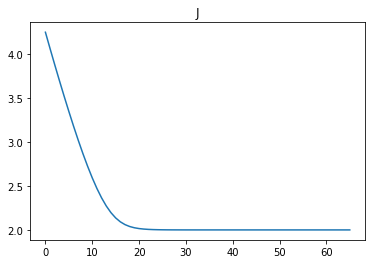

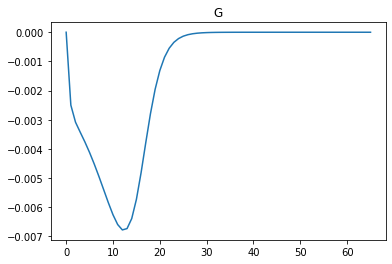

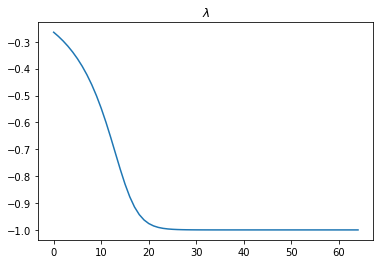

In [5]:
i=1

import matplotlib.pyplot as plt
plt.plot(results[i]['it'],results[i]['J'])
plt.title('J')
plt.figure()
plt.plot(results[i]['it'],[ g[0] for g in results[i]['G']])
plt.title('G')
plt.figure()
plt.plot(results[i]['it'][:-1],[mu[0] for mu in results[i]['muls']])
plt.title('$\lambda$');


Comment on the numerical values of the constraint G. Observe that the objective function keeps decreasing while maintaining the constraint satisfied.

Plot the constraint $x_1x_2=1$ and the optimization trajectories:

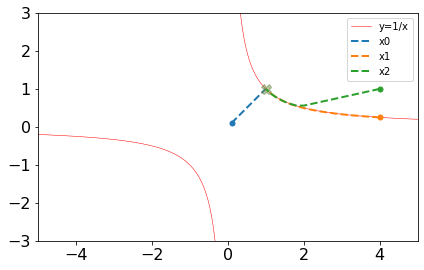

In [6]:
import nullspace_optimizer.examples.draw as draw
t = np.linspace(1/3,5,100)
plt.plot(t,1/t,color='red',linewidth=0.5,label="y=1/x")
plt.plot(-t,-1/t,color='red',linewidth=0.5)
for i, r in enumerate(results):
    draw.drawData(r, f'x{i}', f'C{i}', x0=True, xfinal=True, initlabel=None)


### Further works

1. Adapt the above codes to display other trajectories.
2. Try with other initializations, change the parameter alphaC and alphaJ
3. Comment on the trajectories
4. Try another equality constrained optimization program below

## 2. Another problem

Do the same to solve 

$$
        \begin{aligned}
                \max_{(x_1,x_2)\in\mathbb{R}^{2}} & \qquad x_2\\
                s.t. & \left\{\begin{aligned}
                    (x_1-0.5)^{2}+x_2^{2} &= 2\\
                    (x_1+0.5)^{2}+x_2^{2} &= 2.
                \end{aligned}\right.
            \end{aligned}
$$

In [7]:
class problem2(EuclideanOptimizable):
    def __init__(self,x0):
        super().__init__(2)
        self.xinit = x0
        self.nconstraints = 2
        self.nineqconstraints = 0

    def x0(self):
        return self.xinit

    def J(self, x):
        return -x[1]

    def dJ(self, x):
        return [0, -1]

    def G(self, x):
        return [(x[0]-0.5)**2+x[1]**2-2,(x[0]+0.5)**2+x[1]**2-2]

    def dG(self, x):
        return [[2*(x[0]-0.5),2*x[1]],[2*(x[0]+0.5),2*x[1]]]

In [8]:
def run_problems():
    xinits = ([0,0], [1.0, 0],  [3, -1], [-1.5,-0.5])
    # Write xinits
    problems = [problem2(x0=x0) for x0 in xinits]
    params = {'dt': 0.05,  'alphaJ':2, 'alphaC':1, 'debug': -1}
    return [nlspace_solve(pb, params) for pb in problems]

results=run_problems()



Optimization completed.
31. J=-1.323 G=[-5.529e-08,-5.529e-08] H=[]


Optimization completed.
37. J=-1.323 G=[-3.685e-08,3.784e-08] H=[]


Optimization completed.
68. J=1.323 G=[-4.121e-08,-3.668e-08] H=[]


Optimization completed.
39. J=1.323 G=[-2.874e-08,-6.206e-08] H=[]


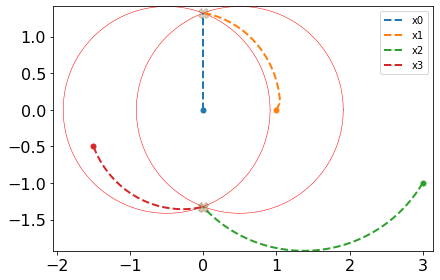

In [9]:
t=np.linspace(0,2*np.pi,100)
plt.plot(0.5+np.sqrt(2)*np.cos(t),np.sqrt(2)*np.sin(t),color='red',linewidth='0.5')
plt.plot(-0.5+np.sqrt(2)*np.cos(t),np.sqrt(2)*np.sin(t),color='red',linewidth='0.5')
plt.axis('equal')
for i, r in enumerate(results):
    draw.drawData(r, f'x{i}', f'C{i}', x0=True, xfinal=True, initlabel=None)

Is the behavior of the trajectories `x2` and `x3` surprising ?